# **Boston House Price Prediction**

## **Solution by: 'Femi Bolarinwa**

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, I'll **identify the most important features affecting the price of the house**. I'll need to employ techniques of data preprocessing and build a model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Solution Content Overview:**
- **Libraries importation**
- **Data Overview**
- **Exploratory Data Analysis (EDA)**
- **Data pre-processing**
- **Modeling**
- **Cross Validation and Evaluation**
- **Verifying Assumptions**
- **Business Insights and Recommendation**

## **Libraries Importation**

In [546]:
#libraries for data manipulation
import numpy as np
import pandas as pd

#libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot

#libraries linear regression modelling
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols

#library for data preparation
from sklearn.model_selection import train_test_split

#library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

#Libraries check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

#Libraries for Goldfeldquandt test for Homoscedasticity/Heteroscedasticity  
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#Libraries for QQplot
import pylab
import scipy.stats as stats

#For supressing warning
import warnings
warnings.filterwarnings("ignore")

## Data Overview

### Loading the dataset

In [491]:
data = pd.read_csv("Boston.csv")
df = data.copy()
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


Observations:
- Data appears to have been loaded properly.
- All variables appear numerical.
- CRIM and NOX appear to have fractional values less than one. This will be confirmed later in the notebook.

In [492]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,11.9


Observations:
- Data appears to have been loaded properly.

In [493]:
df.shape

(506, 13)

Observations:
- The data contains 506 observations (rows) and 13 features (column)

In [494]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


Observations:
- All 13 columns have numerical datatypes (float/int) as expected
- No missing values

In [495]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Observations:
- CRIM appears to have outliers.
- ZN appears highly skewed to the right.
- Univariate analysis will shed more light.

In [496]:
df[df.duplicated()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV


Observations:
- The data contains no duplicates.

In [497]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

Observation:
- This confirms there are no missing values in the data.

## Exploratory Data Analysis (EDA)

### Univariate Analysis

In [498]:
#Custom function to create histogram and boxplot for continuous (numerical) variables.
#The two plots are shown on the same horizontal scale.
#A green vertical line indicates the mean point on the plots.
#A black vertical line indicates the median point on the plots.
#Function takes in column name and desired figure size as inputs.
def boxplot_histogram(feature, figsize = (15,5), bins = None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2,     # Number of rows of the subplot grid
                                           sharex = True, # The X-axis will be shared among all the subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize) 
    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using green arrow
    sns.boxplot(feature, ax = ax_box2, showmeans = True, color ='red')
    # Histogram
    sns.distplot(feature, kde = True, ax = ax_hist2, bins = bins) if bins else sns.distplot(feature, kde = True, ax = ax_hist2)
    #plt.ylabel('count')
    ax_hist2.axvline(np.mean(feature), color = 'g', linestyle = '--')      # Add mean line to the histogram
    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-') # Add median line to the histogram

In [499]:
#Custom Function to create countplots for categorical variable CHAS.
#Custom Function indicates percentage for each category of a variable.
#Custom Function orders the bars in decreasing order of height/percentage.
#Custom Function takes in dataframe and column name as inputs.
def bar_perc(data, z): 
    total = len(data[z]) # Length of the column.
    plt.figure(figsize = (20, 5)) #specify size of figure.
    ax = sns.countplot(data[z], palette = 'Paired',order = data[z].value_counts().index) #countplot
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage 
    plt.show()                                                      # Display the plot

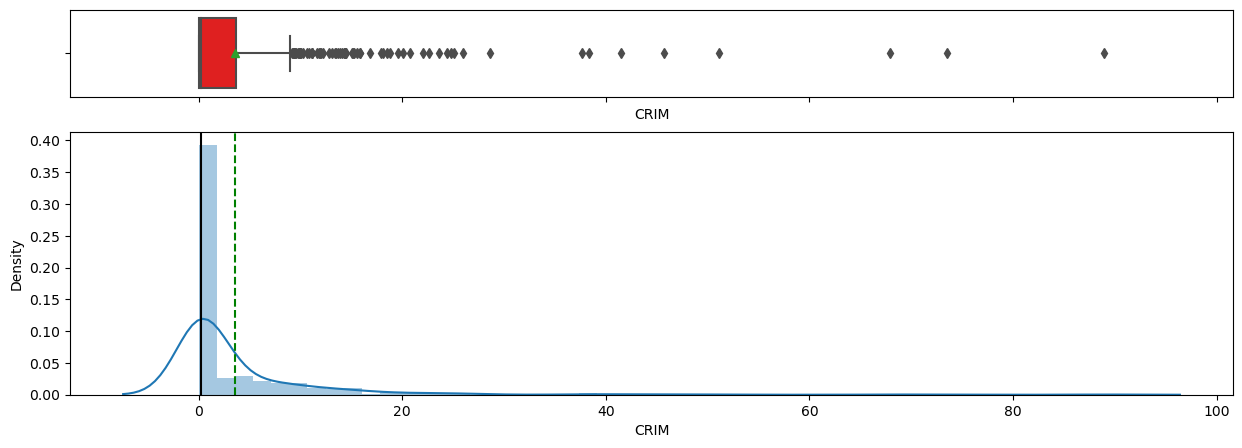

In [500]:
boxplot_histogram(df['CRIM']) #apply custom function to 'CRIM'

Observation:
- Highly skewed to the right
- Significant number of outliers

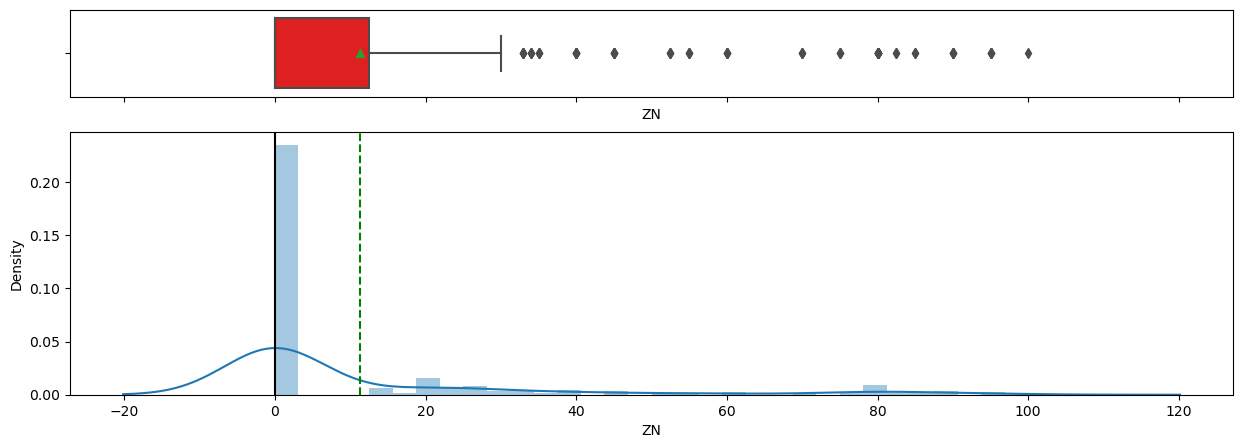

In [501]:
boxplot_histogram(df['ZN']) #apply custom function to 'ZN'

Observation:
- Highly skewed to the right
- Significant number of outliers  
- Distribution has extended tail to the right because of outliers

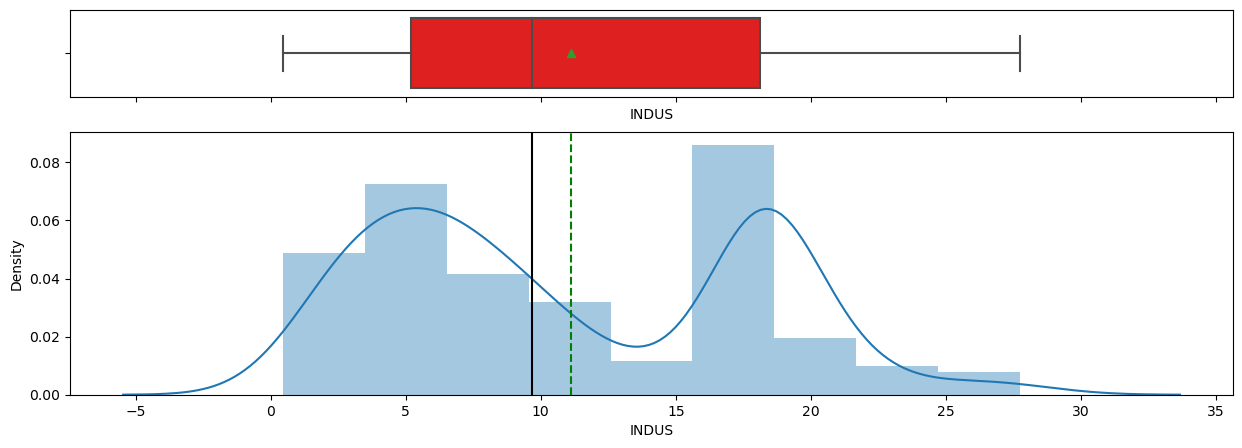

In [502]:
boxplot_histogram(df['INDUS']) #apply custom function to 'INDUS'

Observation:
- Skewed to the right
- No outliers
- Bi-modal distribution. Most houses have around 5 and 18 acres of non-retail business acres.

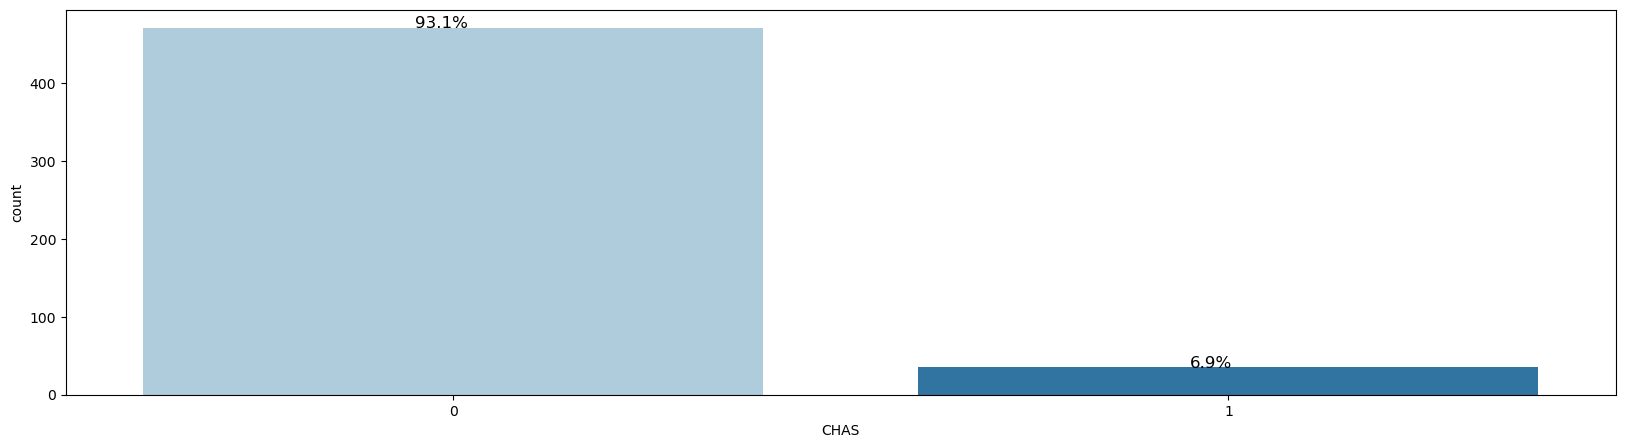

In [503]:
bar_perc(df, 'CHAS') #apply custom function to 'CHAS'

Observation:
- Significantly more houses have tract bounds with charles river. 93% to 7%.

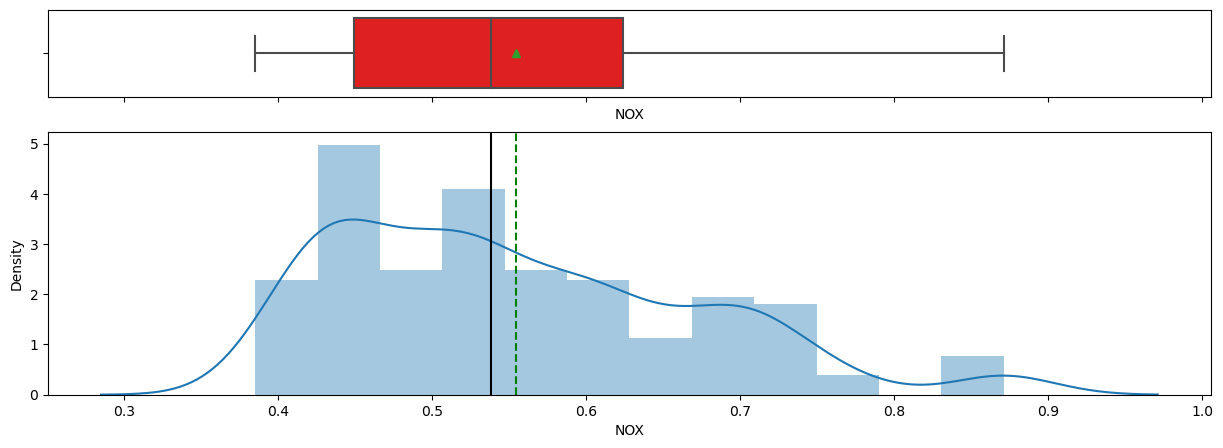

In [504]:
boxplot_histogram(df['NOX']) #apply custom function to 'NOX'

Observation:
- Slightly skewed to the right
- No outliers
- Distribution has extended tail to the right

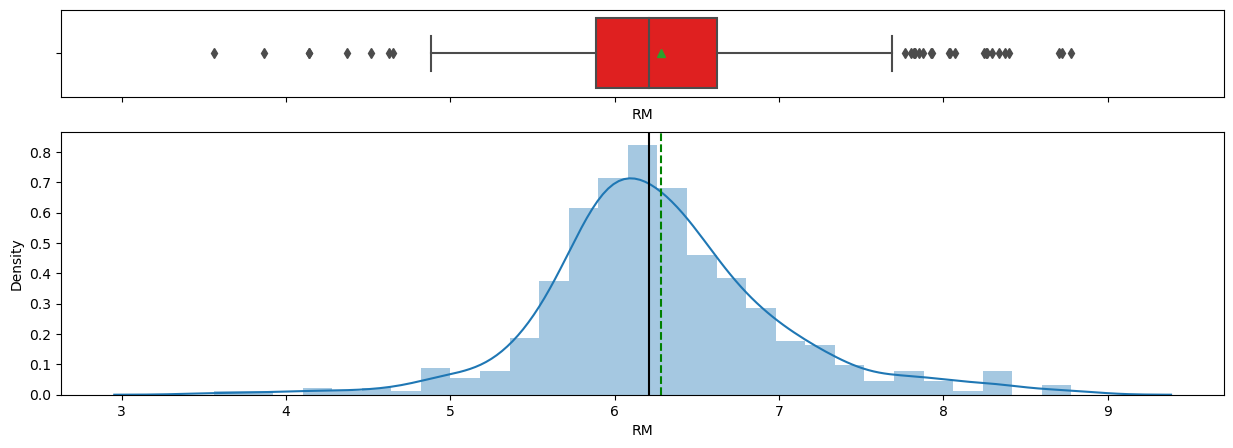

In [505]:
boxplot_histogram(df['RM']) #apply custom function to 'RM'

Observation:
- Nearly normal distribution of rooms per dwelling.
- Slightly skewed to the right
- Extended tails on both sides because of outliers.

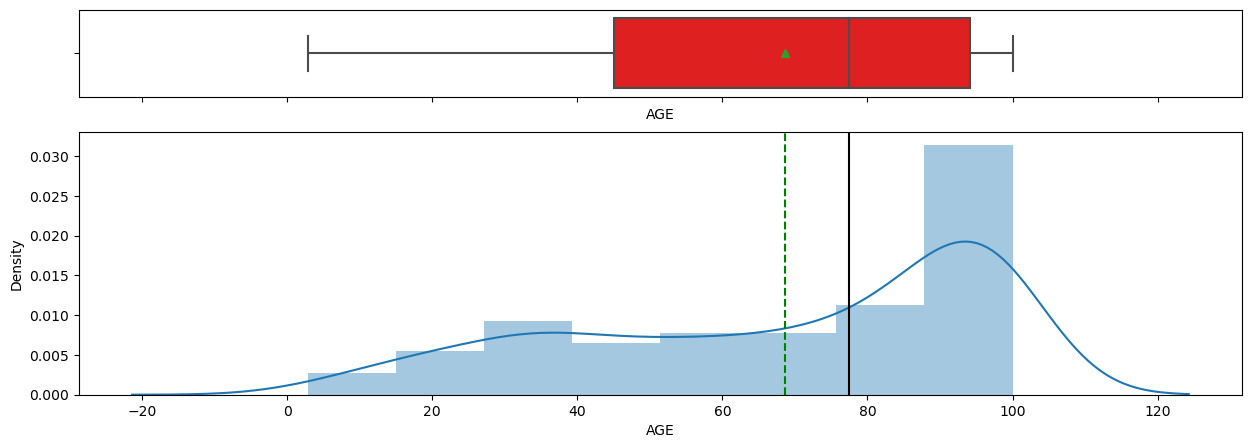

In [506]:
boxplot_histogram(df['AGE']) #apply custom function to 'AGE'

Observation:
- Skewed to the left
- No outliers.

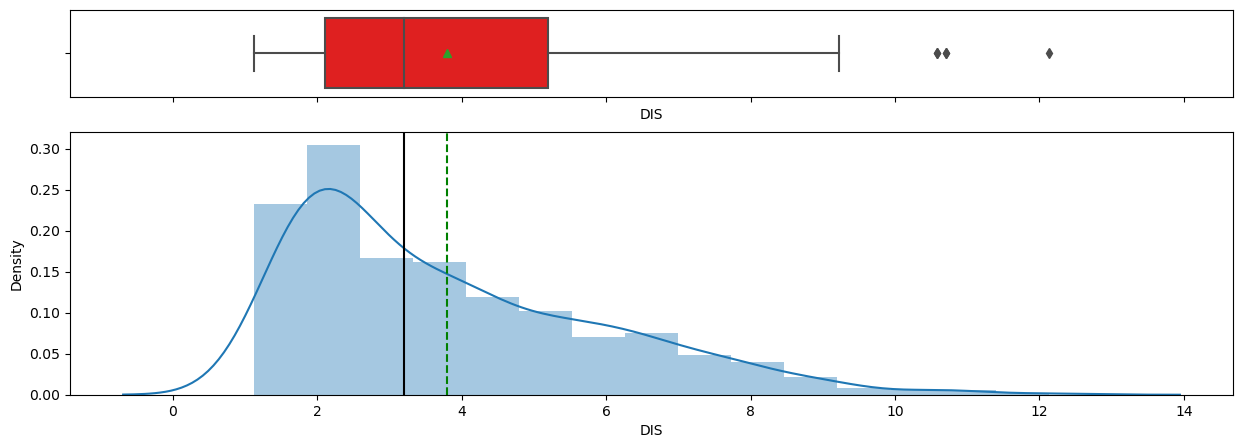

In [507]:
boxplot_histogram(df['DIS']) #apply custom function to 'DIS'

Observation:
- Skewed to the right
- Few outliers

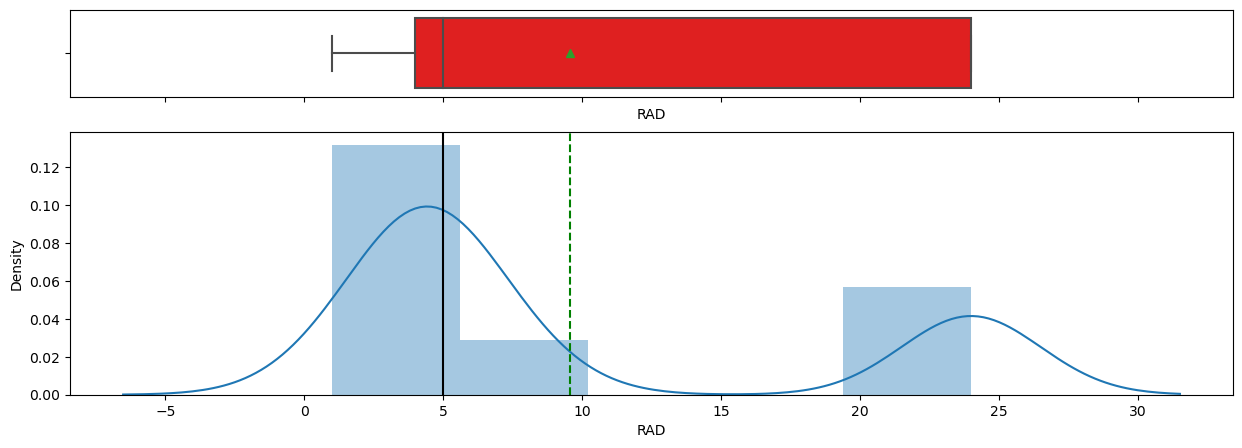

In [508]:
boxplot_histogram(df['RAD']) #apply custom function to 'RAD'

Observation:
- Skewed to the right
- No outliers
- Bi-modal distribution. Most houses have around 5 and 24 accessibilty index

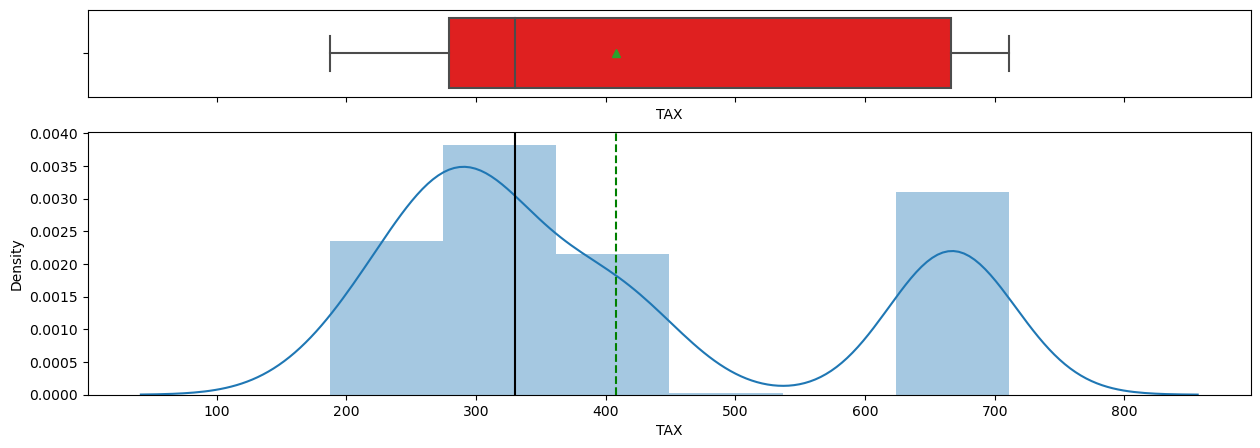

In [509]:
boxplot_histogram(df['TAX']) #apply custom function to 'TAX'

Observation:
- Skewed to the right
- No outliers
- Bi-modal distribution. Most houses paid around 300 and 680 in taxes

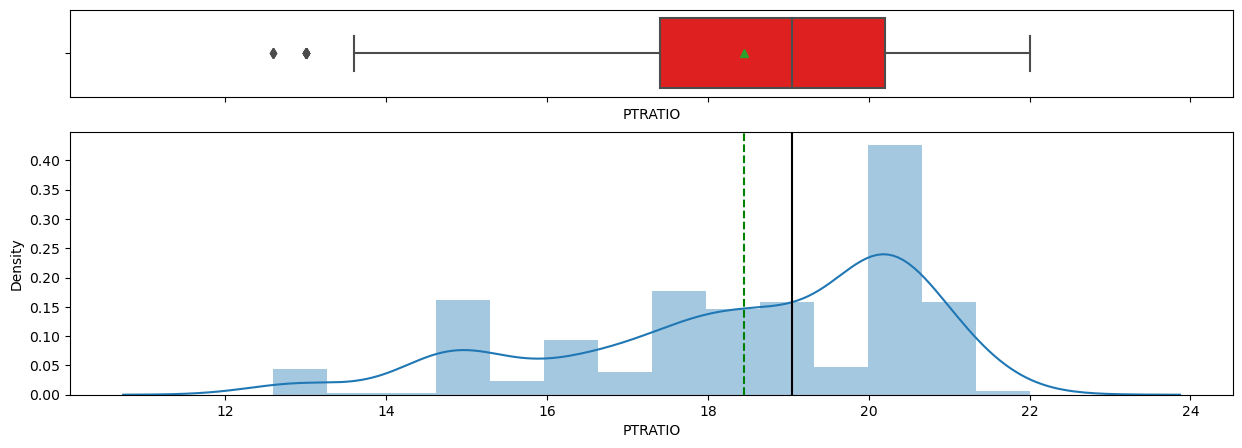

In [510]:
boxplot_histogram(df['PTRATIO']) #apply custom function to 'PTRATIO'

Observation:
- Skewed to the left
- Few outliers

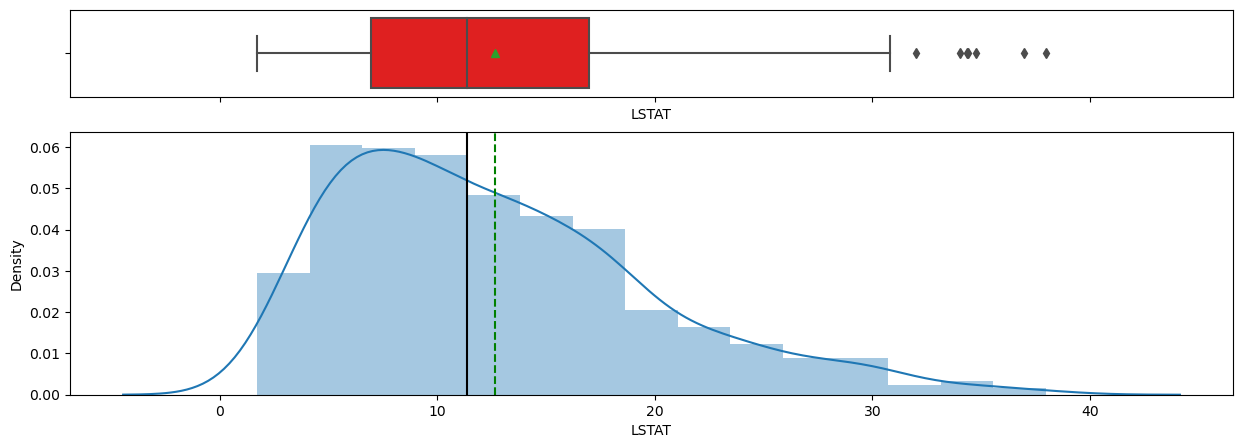

In [511]:
boxplot_histogram(df['LSTAT']) #apply custom function to 'LSTAT'

Observation:
- Skewed to the right
- Few outliers

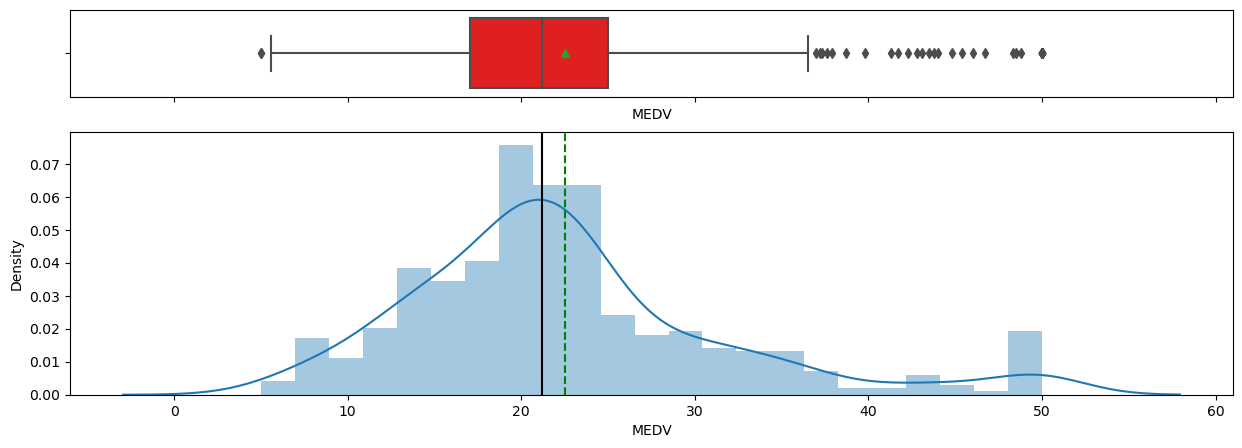

In [512]:
boxplot_histogram(df['MEDV']) #apply custom function to 'MEDV'

Observation:
- Skewed to the right
- Significant outliers
- Distribution non-normal. Transformation will be required for good modelling.

### Bivariate Analysis

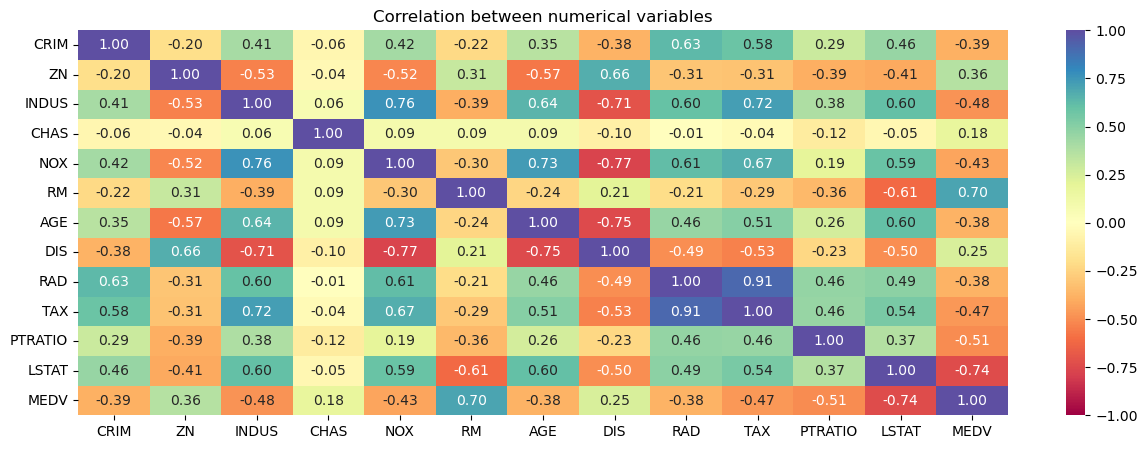

In [513]:
#heatmap of correlation
plt.figure(figsize = (15, 5))
corr_df = df.corr()
sns.heatmap(corr_df,annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral")
plt.title('Correlation between numerical variables')
plt.show()

Observation:
- Target variable MEDV has significant correlation with RM, LSTAT, PTRATIO, TAX, NOX. I'll keep an eye out for these variables while building the model. 
- These independent variables (LSTAT, PTRATIO, TAX, NOX) also have some correlation among themselves. This is a sign of multicolinearity that needs to be addressed before a regression model is built

In [514]:
#Identifying features with significant correlation for bivariate analysis
corr_df[(corr_df >= 0.69) | (corr_df <= -0.69)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INDUS,NaN,NaN,1.000000,NaN,0.763651,NaN,NaN,-0.708027,NaN,0.720760,NaN,NaN,NaN
CHAS,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,NaN,NaN,0.763651,NaN,1.000000,NaN,0.731470,-0.769230,NaN,NaN,NaN,NaN,NaN
RM,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.695360
AGE,NaN,NaN,NaN,NaN,0.731470,NaN,1.000000,-0.747881,NaN,NaN,NaN,NaN,NaN
DIS,NaN,NaN,-0.708027,NaN,-0.769230,NaN,-0.747881,1.000000,NaN,NaN,NaN,NaN,NaN
RAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.910228,NaN,NaN,NaN
TAX,NaN,NaN,0.720760,NaN,NaN,NaN,NaN,NaN,0.910228,1.000000,NaN,NaN,NaN


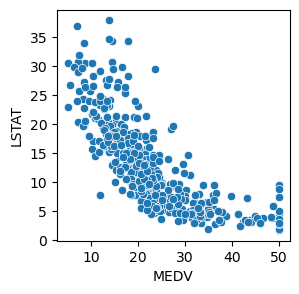

In [515]:
# Scatterplot to visualize the relationship between MEDV and LSTAT
plt.figure(figsize = (3, 3))
sns.scatterplot(x = 'MEDV', y = 'LSTAT', data = df)
plt.show()

Observation:
- Negative correlation apparent
- House prices (MEDV) appear to decrease with increase in LSTAT

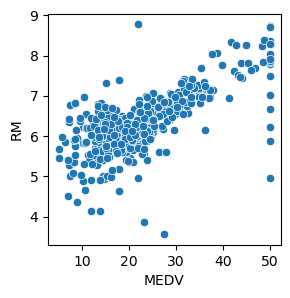

In [516]:
# Scatterplot to visualize the relationship between MEDV and RM
plt.figure(figsize = (3, 3))
sns.scatterplot(x = 'MEDV', y = 'RM', data = df)
plt.show()

Observation:
- Positive correlation apparent
- House prices (MEDV) appear to increase with increase in number of rooms in the house

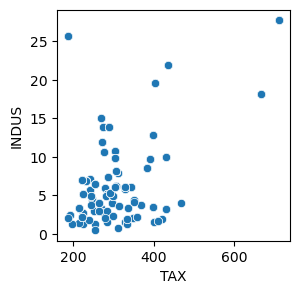

In [517]:
# Scatterplot to visualize the relationship between TAX and INDUS
plt.figure(figsize = (3, 3))
sns.scatterplot(x = 'TAX', y = 'INDUS', data = df)
plt.show()

Observation:
- Positive correlation apparent
- Tax appear to increase with increase in INDUS

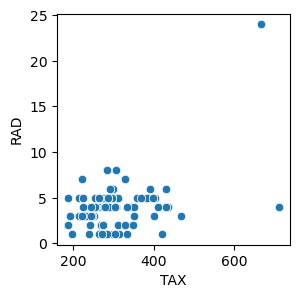

In [518]:
# Scatterplot to visualize the relationship between TAX and RAD
plt.figure(figsize = (3, 3))
sns.scatterplot(x = 'TAX', y = 'RAD', data = df)
plt.show()

Observation:
- Positive correlation of 0.9 is not readily apparent
- Correlation value might be skewed because of outliers.

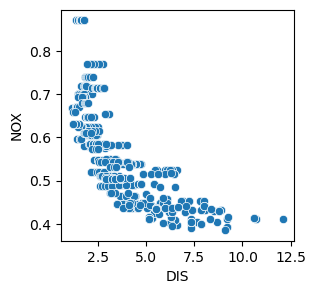

In [519]:
# Scatterplot to visualize the relationship between DIS and NOX
plt.figure(figsize = (3, 3))
sns.scatterplot(x = 'DIS', y = 'NOX', data = df)
plt.show()

Observation:
- Negative correlation apparent.
- Nitric Oxide concentration appear to decrease with increase in distances to five Boston employment centers.

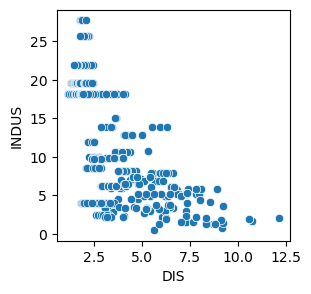

In [520]:
# Scatterplot to visualize the relationship between DIS and INDUS
plt.figure(figsize = (3, 3))
sns.scatterplot(x = 'DIS', y = 'INDUS', data = df)
plt.show()

Observation:
- Negative correlation apparent.
- INDUS appear to decrease with increase in distances to five Boston employment centers.

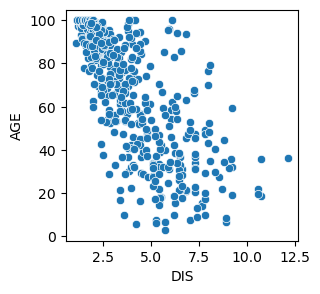

In [521]:
# Scatterplot to visualize the relationship between DIS and AGE
plt.figure(figsize = (3, 3))
sns.scatterplot(x = 'DIS', y = 'AGE', data = df)
plt.show()

Observation:
- Negative correlation apparent.
- AGE appear to decrease with increase in distances to five Boston employment centers.

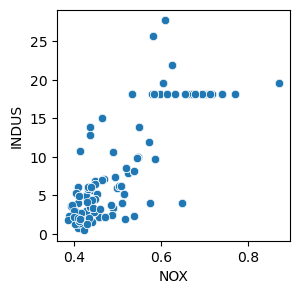

In [522]:
# Scatterplot to visualize the relationship between NOX and INDUS
plt.figure(figsize = (3, 3))
sns.scatterplot(x = 'NOX', y = 'INDUS', data = df)
plt.show()

Observation:
- Positive correlation apparent.
- INDUS appear to increase with increase in Nitric Oxide concentration

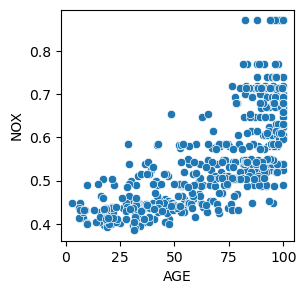

In [523]:
# Scatterplot to visualize the relationship between NOX and AGE
plt.figure(figsize = (3, 3))
sns.scatterplot(x = 'AGE', y = 'NOX', data = df)
plt.show()

Observation:
- Positive correlation apparent.
- Nitric Oxide concentration appear to increase with increase in AGE

## Data Preprocessing

### Transformation of Target Variable

In [524]:
#applying various transformation to the target variable to see which is closest to normal distribution
MEDV_transforms = pd.DataFrame()
MEDV_transforms['MEDV_log'] = np.log(df['MEDV'])
MEDV_transforms['MEDV_sqrt'] = np.sqrt(df['MEDV'])
MEDV_transforms['MEDV_inv'] = np.reciprocal(df['MEDV'])

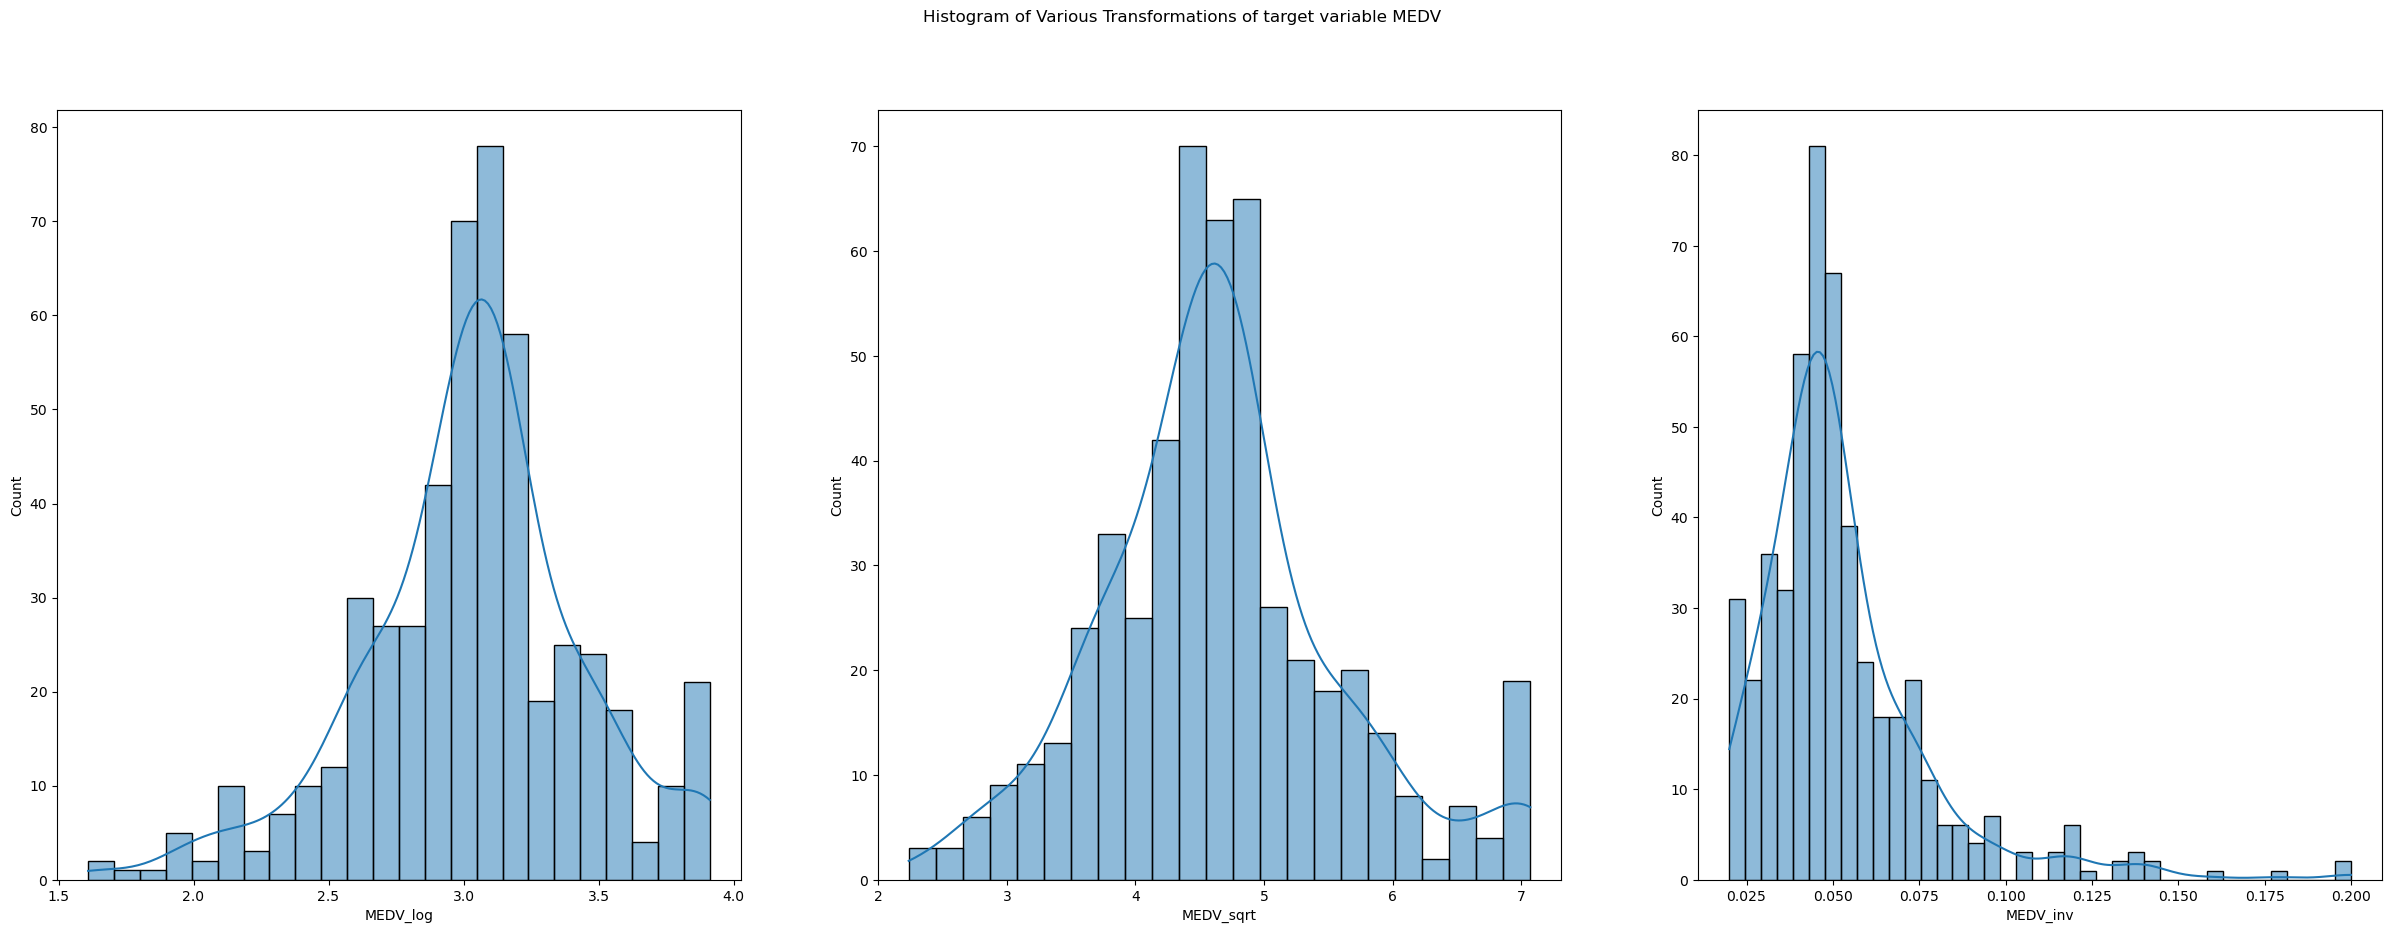

In [525]:
fig, axes = plt.subplots(1, 3, figsize = (30, 10))
fig.suptitle('Histogram of Various Transformations of target variable MEDV')
col = ['MEDV_log','MEDV_sqrt','MEDV_inv']
for i,n in enumerate(col):
    sns.histplot(data = MEDV_transforms, x = n, kde = True, ax = axes[i])    

Observation:
- Log and square-root transformations appear to be closer to normal distribution.
- Log transformation will be used for regression

### Splitting the dataset

In [526]:
# Separate the dependent variable and indepedent variables
Y = np.log(df['MEDV']) 
X = df.drop(columns = {'MEDV'})

# Add the intercept term
X = sm.add_constant(X)

In [527]:
# splitting the data in training and test datasets at 70:30
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [528]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

### **Check for Multicollinearity**
- One assumption of linear regression is that no multi-colinearity among predictor variables.
- I will use the Variance Inflation Factor (VIF), to check for multicollinearity in the data.
- Features having a VIF score > 10 will be dropped / treated till all the features have a VIF score < 10

In [529]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns
    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

In [530]:
#calculating VIF
print(checking_vif(X_train))

    feature         VIF
0     const  535.372593
1      CRIM    1.924114
2        ZN    2.743574
3     INDUS    3.999538
4      CHAS    1.076564
5       NOX    4.396157
6        RM    1.860950
7       AGE    3.150170
8       DIS    4.355469
9       RAD    8.345247
10      TAX   10.191941
11  PTRATIO    1.943409
12    LSTAT    2.861881


Observation:
- TAX and RAD have high VIFs 
- I will drop the highest TAX first and re-evaluate the VIF

In [531]:
X_train = X_train.drop('TAX',axis = 1)
X_test = X_test.drop('TAX',axis = 1)
# Check for VIF again
print(checking_vif(X_train))

    feature         VIF
0     const  532.025529
1      CRIM    1.923159
2        ZN    2.483399
3     INDUS    3.270983
4      CHAS    1.050708
5       NOX    4.361847
6        RM    1.857918
7       AGE    3.149005
8       DIS    4.333734
9       RAD    2.942862
10  PTRATIO    1.909750
11    LSTAT    2.860251


Observation:
- All remaining features now have VIF less than 5. I'll assume no significant multicolinearity among features.

## Model Building - Linear Regression

### Model 1

In [532]:
# Creating the model
m = sm.OLS(y_train, X_train)
model1 = m.fit()
#model summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     103.3
Date:                Wed, 17 May 2023   Prob (F-statistic):          1.40e-101
Time:                        16:41:13   Log-Likelihood:                 76.596
No. Observations:                 354   AIC:                            -129.2
Df Residuals:                     342   BIC:                            -82.76
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6324      0.243     19.057      0.0

Observation:
- Three coefficients (ZN, INDUS, and AGE) have p-values of greater than 5% (level of significance) which means we fail to reject the null hypothesis that those coefficients are zero. They are not statistically significant enough or have enough predictive power to predict the target variable. I'll drop them and rebuild model.
- Decent R-squared and adjusted R-squared values of 0.769 and 0.761 respectively

In [533]:
#I will drop the 3 features with p-values greater than 5% to improve the model
X_train = X_train.drop(['ZN','INDUS','AGE'],axis = 1)
X_test = X_test.drop(['ZN','INDUS','AGE'],axis = 1)

### Model 2

In [534]:
m = sm.OLS(y_train, X_train)
model2 = m.fit()
#model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Wed, 17 May 2023   Prob (F-statistic):          2.61e-104
Time:                        16:41:13   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6494      0.242     19.242      0.0

Observation:
- All remaining coefficients have p-values of less than 5% which means they are statistically significant or have enough predictive power to predict the target variable.
- The true value of the coefficients of the remaining independent variables lie within the confidence interval  with a 95% likelihood.
- Each 'coef' represents the change in the output Y due to a change of one unit in the variable (everything else held constant).
- 'std err' reflects the level of accuracy of the coefficients. The lower it is, the more accurate the coefficients are.
- Adjusted R-squared improved slightly to 0.762. This means the model can explain variance in the Log(MEDV) for up to 76%.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied:
1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

### **1. Check for mean residuals**

In [535]:
residuals = model2.resid
np.mean(residuals)

-5.5837318447531885e-15

Observation:
- Practically zero mean of residuals. Assumption satisfied.

### **2. Check for homoscedasticity**
- Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to be homoscedastic.
- Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.
- I'll use `Goldfeldquandt Test` to test the following hypothesis with alpha = 0.05:
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [536]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(y_train, X_train)
lzip(name, test)

[('F statistic', 1.0835082923425283), ('p-value', 0.3019012006766869)]

**Observation:**

- Since p-value > 0.05, we cannot reject the Null Hypothesis that the residuals are homoscedastic. Corresponding assumption is satisfied.

### **3. Linearity of variables**
It states that the predictor variables must have a linear relation with the dependent variable.
To test the assumption, I'll plot residuals and the fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

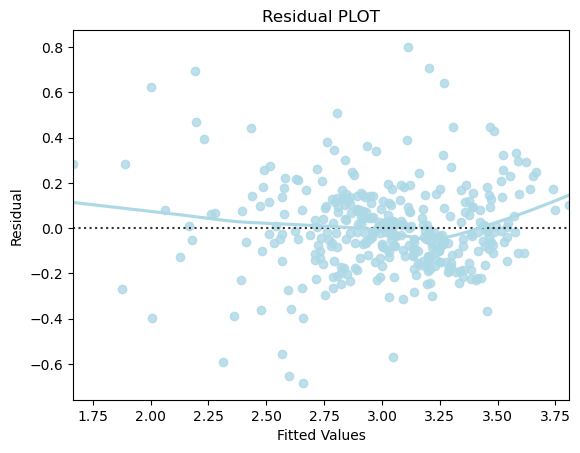

In [537]:
# Predicted values
fitted = model2.fittedvalues
# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color = "lightblue", lowess = True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

**Observation:**

- There is no pattern in the residual vs fitted values plot. Hence, the corresponding assumption is satisfied.

### **4. Normality of error terms**
The residuals should be normally distributed.

<AxesSubplot:ylabel='Count'>

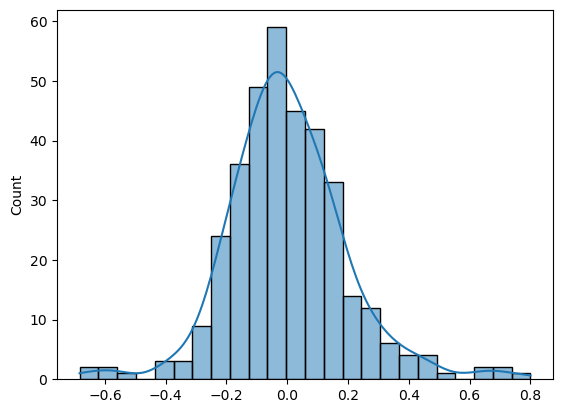

In [538]:
# Plot histogram of residuals
sns.histplot(residuals, kde = True)

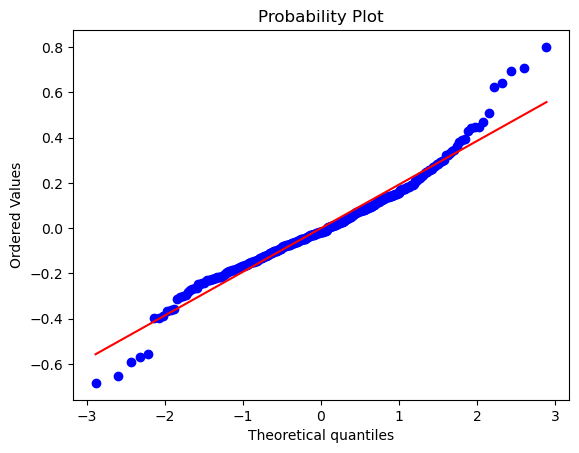

In [539]:
stats.probplot(residuals, dist = "norm", plot = pylab)
plt.show()

**Observation:**

- From the above plots, the residuals seem to follow a normal distribution. Hence, the corresponding assumption is satisfied.

### **K-Fold Cross Validation**
I'll check the performance of the model using the cross-validation technique from the scikit-learn library and see if the performance on the train and the test data is comparable to what we are getting after cross-validating the data. 

In [540]:
# Import the required function

from sklearn.model_selection import cross_val_score
# Build the regression model and cross-validate
linearregression = LinearRegression()  
cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error')                                  
print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.729 (+/- 0.232)
Mean Squared Error: 0.041 (+/- 0.023)


**Observations:**

- The R-Squared on the cross-validation is 0.73 which is similar to the R-Squared (0.76) on the training and test datasets.
- The MSE on cross-validation is 0.041 which is also similar to the MSE ((0.2)^2) on the training and test dataset.

## Model Performance Evaluation

In [541]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)                  # Predict using the independent variables
    r2 = r2_score(target, pred)                       # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)    # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)           # To compute MAE
    mape = mape_score(target, pred)                   # To compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

#### Model performance on unseen test data

In [542]:
lin_reg_test = model_performance_regression(model2, X_test, y_test)
lin_reg_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.198045,0.151284,0.772486,0.758066,5.257965


#### Model performance on training data

In [543]:
lin_reg_train = model_performance_regression(model2, X_train, y_train)
lin_reg_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.195504,0.143686,0.767174,0.761082,4.981813


Observation:
- r2-scores and RMSE of train and test data are identical, indicating that our model is not overfitting to the training data. Model is **a good fit**. It is giving a generalized performance.
- Mean Absolute Error (MAE) indicates that the model can predict Log(MEDV) within mean error of 0.15 on the test data.
- The units of both RMSE and MAE are the same. But RMSE is greater than MAE because it penalizes the outliers more.
- Mean Absolute Percentage Error (MAPE) is ~5% on the test data, indicating that the average difference between the predicted value and the actual value is ~5%.

## Final Model

In [544]:
coef = model2.params
pd.DataFrame({'Feature' : coef.index, 'Coefs' : coef.values})

,Feature,Coefs
0,const,4.649386
1,CRIM,-0.012500
2,CHAS,0.119773
3,NOX,-1.056225
4,RM,0.058907
5,DIS,-0.044069
6,RAD,0.007848
7,PTRATIO,-0.048504
8,LSTAT,-0.029277


In [545]:
#equation of the model
Equation = "Log(MEDV)="
print(Equation, end='\t')
for i in range(len(coef)):
    print('(', round(coef[i],3), ') * ', coef.index[i], '+', end = ' ')

Log(MEDV)=	( 4.649 ) *  const + ( -0.013 ) *  CRIM + ( 0.12 ) *  CHAS + ( -1.056 ) *  NOX + ( 0.059 ) *  RM + ( -0.044 ) *  DIS + ( 0.008 ) *  RAD + ( -0.049 ) *  PTRATIO + ( -0.029 ) *  LSTAT + 

## Actionable Insights and Recommendations 

- NOX has the most impact on house prices. A unit increase in Nitric Oxide concentration in a neigbourhood will cause about a unit decrease in the log of house price. Thats ten fold reduction in the house value. Developers, Home owners and city council need to work together to keep NO at lowest levels possible.
- Charles River (CHAS) has the second most impact on prices, albeit positive. The river needs to be preserved and protected from pollution.
- Intuitively, number of rooms (RM) and assess to highways (RAD) affect price positively.
- Houses closer to top five Boston employment centers  (DIS) appear to cost more.
- Parents seem to prefer neighbourhood with better Pupil-to-teacher ratio. (PTRATIO).
- Crime rate (CRIM) affects prices negatively. Home-owners associations should work with the police to keep crime rate down.